In [1]:
# Purpose: 
# 1. Catch any outliers
# 2. Visualize possible relationships for feature engineering
import os
os.getcwd()
os.chdir('..')

In [42]:
# Specify libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in raw data
df = pd.read_csv('data/data_processed.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


First, take a look at our dependent variable: SalePrice

In [5]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

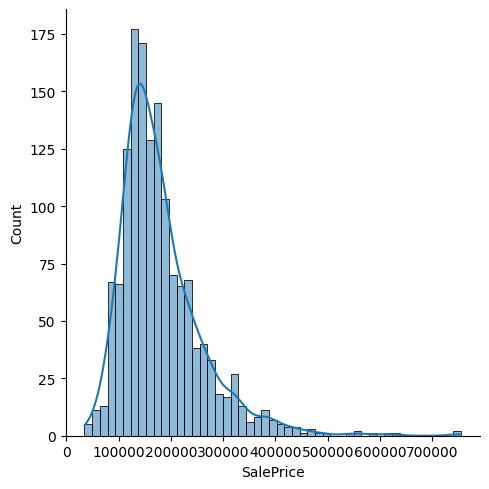

In [20]:
sns.displot(df.SalePrice, kde = True)

# Right skewed
# Not normal distribution


In [25]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Multivariate analyses: Let's take a look at how SalesPrice trends with:
- Numerical: 'GrLivArea', 'TotalBsmtSF'
- Categorical: 'OverallQual' , 'YearBuilt'

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

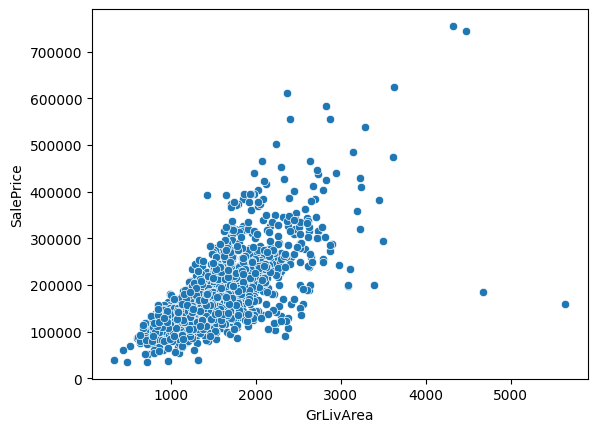

In [29]:
#scatter plot grlivarea/saleprice
ind_var = 'GrLivArea'
dep_var = 'SalePrice'
sns.scatterplot(df, x = ind_var, y = dep_var)

<AxesSubplot: xlabel='TotalBsmtSF', ylabel='SalePrice'>

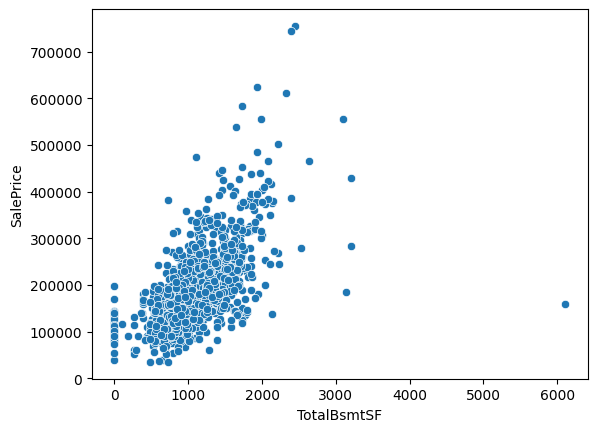

In [30]:
#scatter plot totalbsmtsf/saleprice
ind_var = 'TotalBsmtSF'
dep_var = 'SalePrice'
sns.scatterplot(df, x = ind_var, y = dep_var)

(-0.5, 9.5, 0.0, 800000.0)

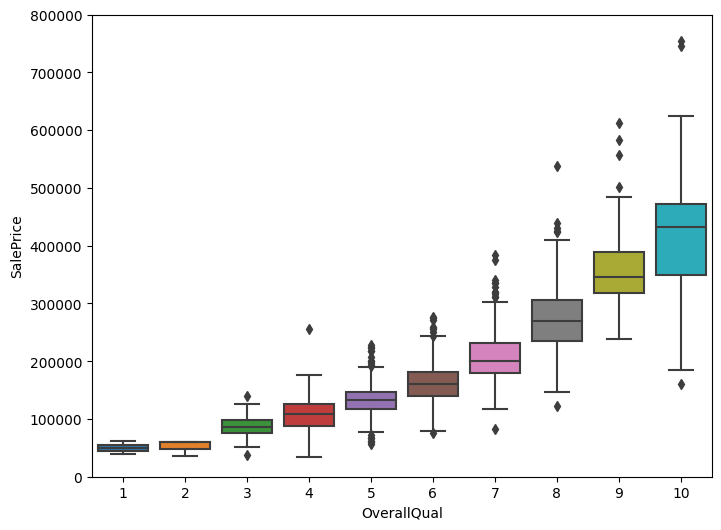

In [35]:
#box plot overallqual/saleprice
ind_var = 'OverallQual'
dep_var = 'SalePrice'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=ind_var, y=dep_var, data=df)
fig.axis(ymin=0, ymax=800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

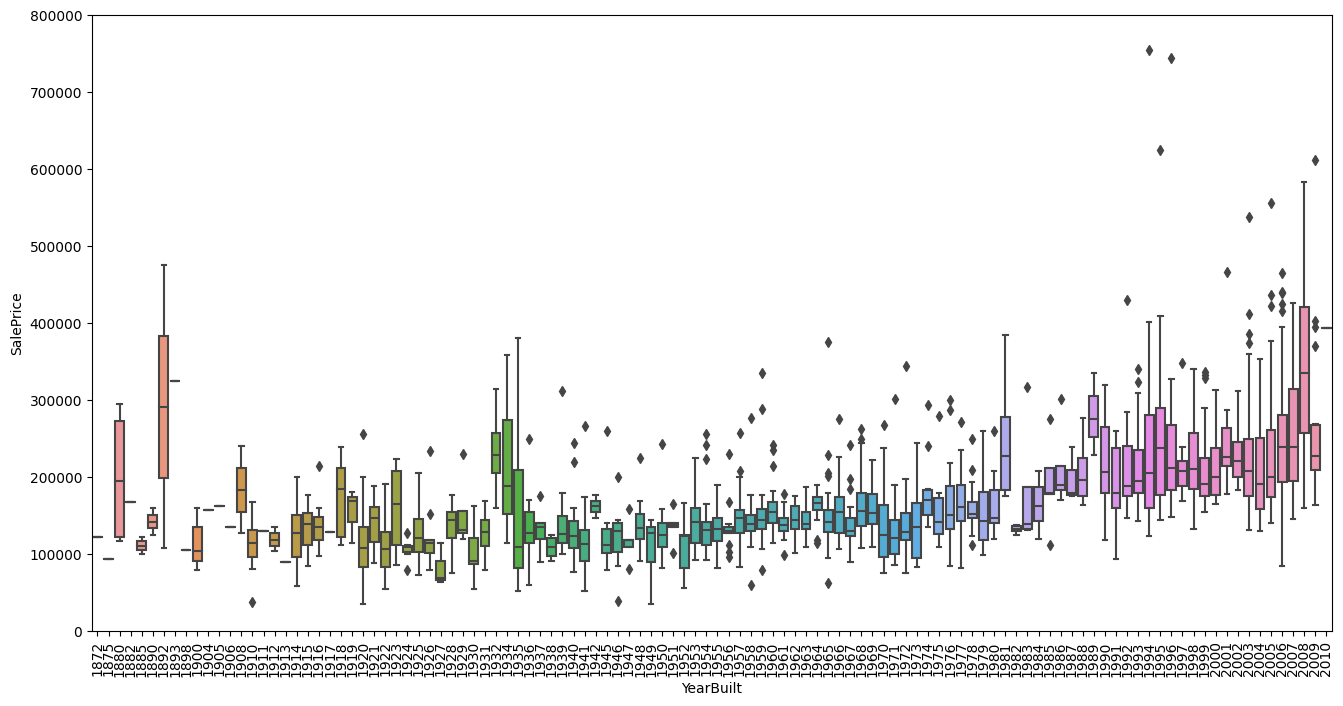

In [43]:
#box plot overallqual/saleprice
ind_var = 'YearBuilt'
dep_var = 'SalePrice'
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=ind_var, y=dep_var, data=df)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation = 90)

<AxesSubplot: xlabel='YearBuilt'>

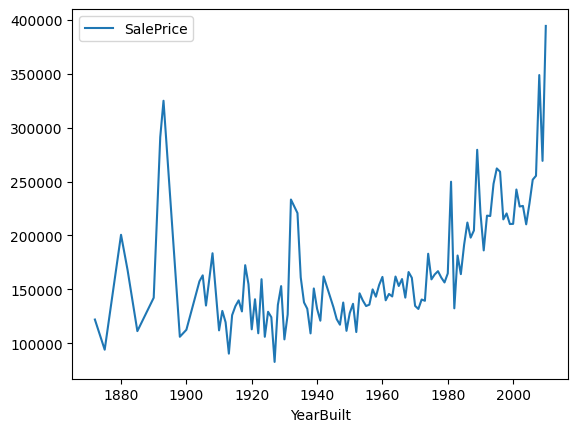

In [55]:
# Zoom in on YearBuilt against mean of SalePrice
SalePriceMean_YearBuilt = df.groupby('YearBuilt').agg({'SalePrice':'mean'})
sns.lineplot(SalePriceMean_YearBuilt)
# Specific old builds are valuable, but otherwise, the trend follows that newer => higher sale price

Correlation Matrix

<AxesSubplot: >

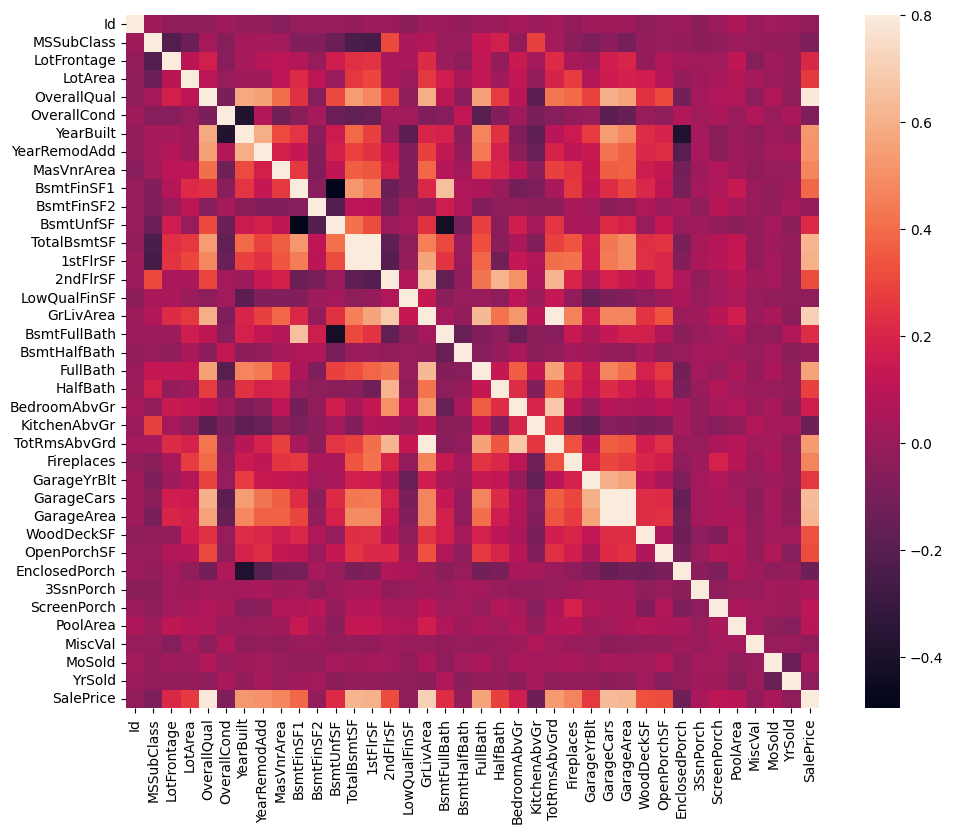

In [45]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

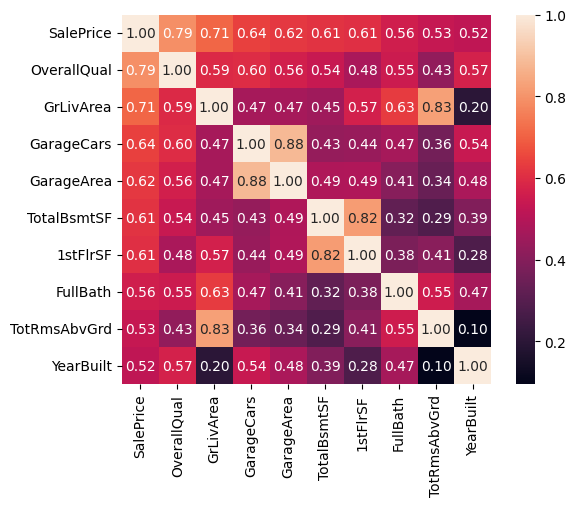

In [47]:
# Zoomed Heatmap
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

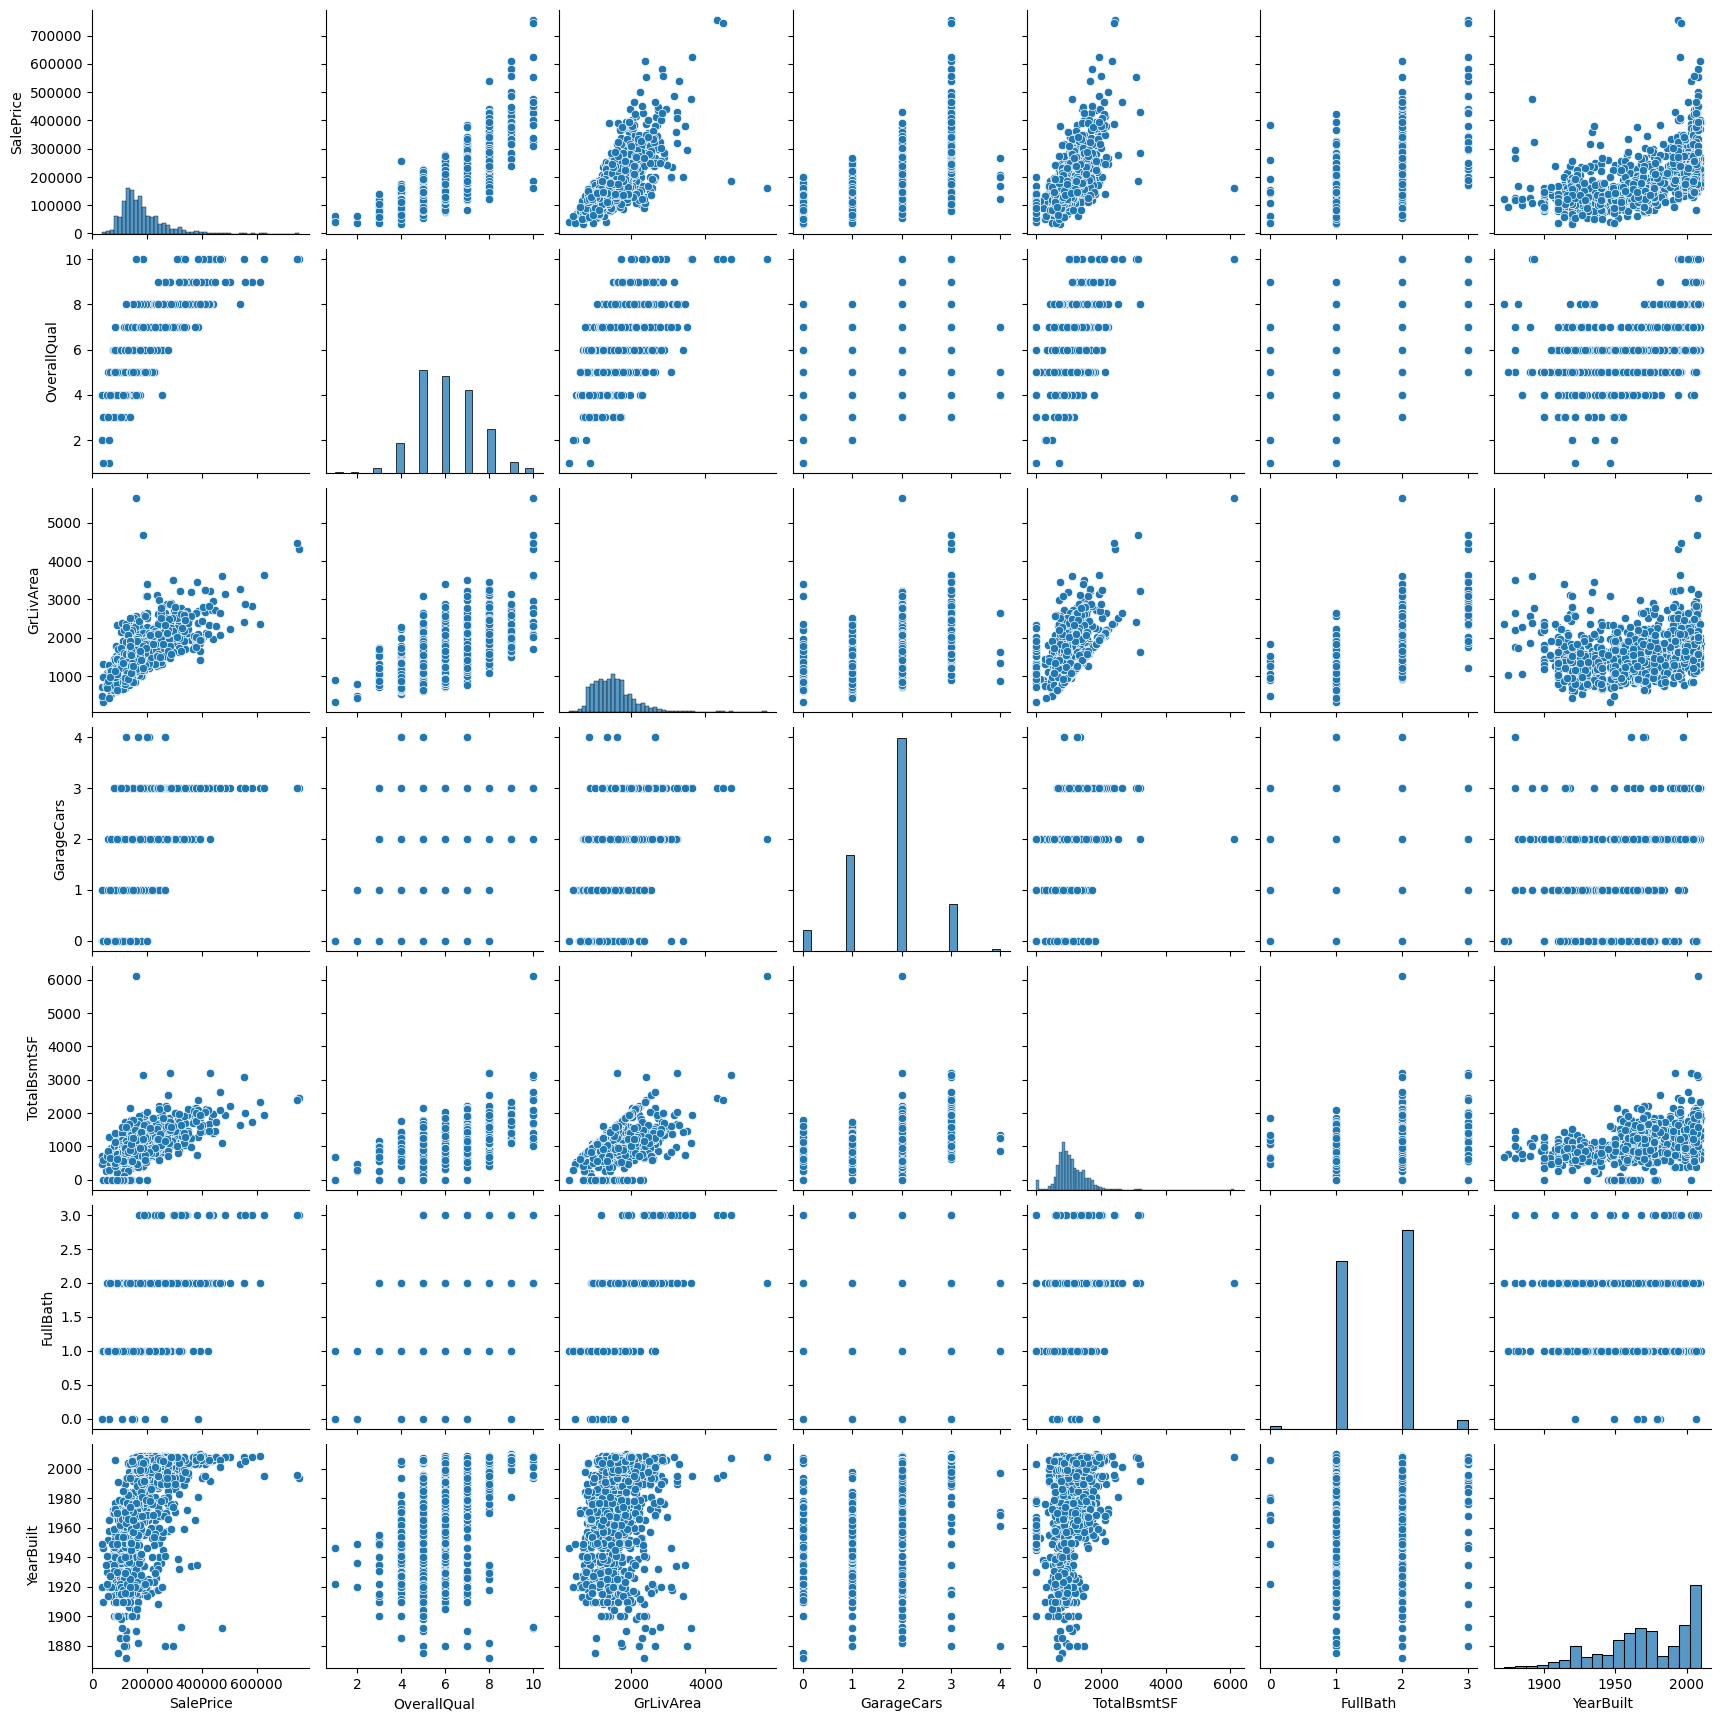

In [56]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

Outliers

From code below: 
- Low range values are similar and not too far from 0.
- High range values are far from 0 and the 7. Some of the rows are out of range (outliers!)

In [59]:
from sklearn.preprocessing import StandardScaler
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


The 